In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv('student-mat.csv', delimiter=';')
pd.set_option('display.max_columns', None)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [91]:
data.shape

(395, 33)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [93]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [94]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [95]:
data_new = pd.get_dummies(data, drop_first=True)
data_new.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False


In [96]:
data_new.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [97]:
data_new.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,False,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False


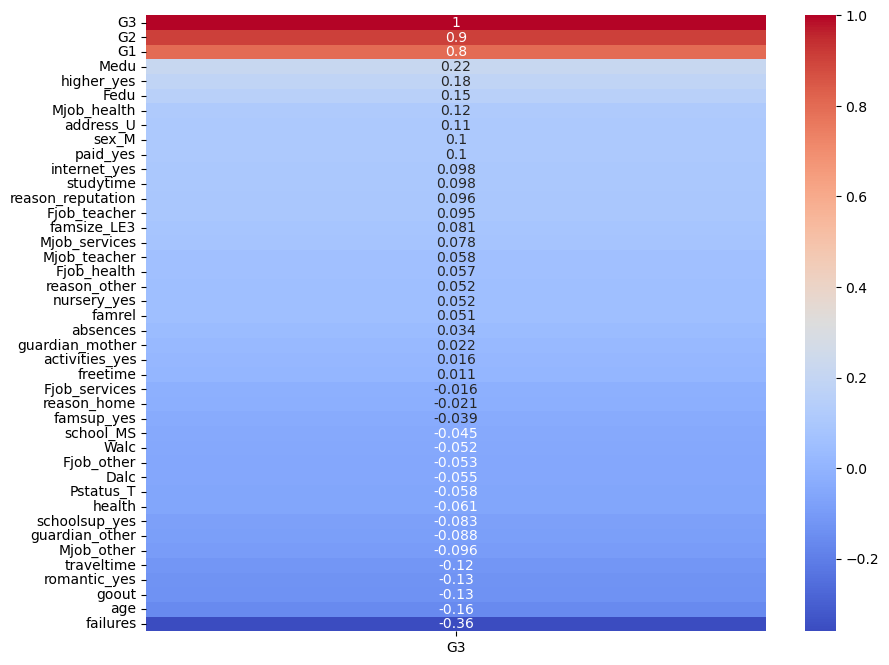

In [98]:
correlation_matrix = data_new.corr()
correlation_with_target = correlation_matrix["G3"].sort_values(ascending=False)
correlation_with_target_df = correlation_with_target.to_frame()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target_df, annot=True, cmap='coolwarm')
plt.show()

Text(0, 0.5, 'Frequency')

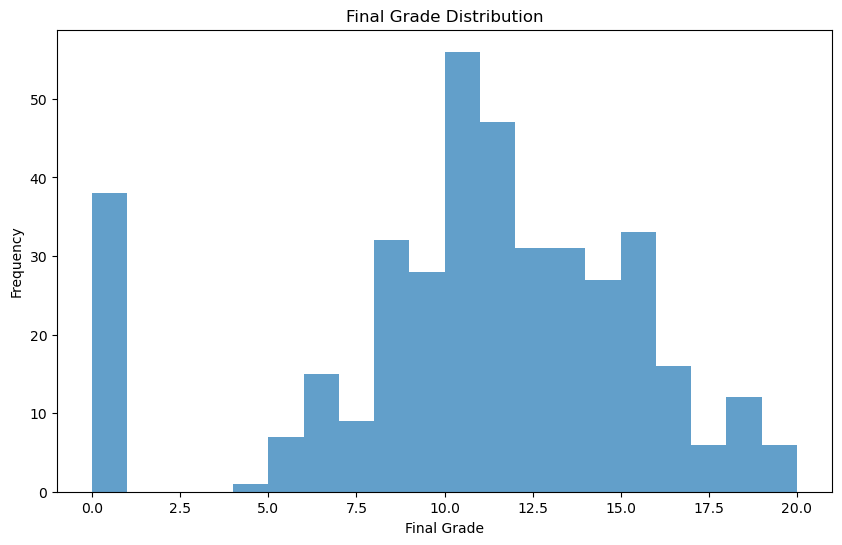

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(data_new['G3'], bins=20, alpha=0.7)
ax.set_title('Final Grade Distribution')
ax.set_xlabel('Final Grade')
ax.set_ylabel('Frequency')

In [109]:
data_new[data_new['G3']==0]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
128,18,2,2,1,1,2,3,3,3,1,2,4,0,7,4,0,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,True,True,True,True,False
130,15,3,4,2,3,2,4,2,2,2,2,5,0,12,0,0,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True
131,15,1,1,3,1,0,4,3,3,1,2,4,0,8,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True
134,15,3,4,4,2,0,5,3,3,1,1,5,0,9,0,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True
135,15,4,4,1,3,0,4,3,3,1,1,5,0,11,0,0,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True
136,17,3,4,3,2,0,5,4,5,2,4,5,0,10,0,0,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
137,16,3,3,2,1,2,4,3,2,1,1,5,0,4,0,0,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,True,True
140,15,4,3,2,4,0,2,2,2,1,1,3,0,7,9,0,False,True,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False
144,17,2,1,1,1,3,5,4,5,1,2,5,0,5,0,0,False,True,True,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True,False
146,15,3,2,1,2,3,3,3,2,1,1,3,0,6,7,0,False,False,True,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,True,True,False


In [110]:
data_new[data_new['G3']==0].shape

(38, 42)

In [100]:
data_new.groupby('studytime')['G3'].mean()

studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64

Text(0, 0.5, 'Frequency')

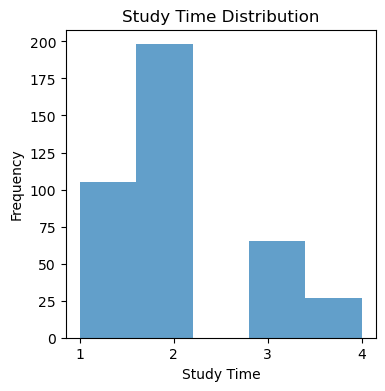

In [101]:
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(data_new['studytime'], bins=5, alpha=0.7)
ax.set_title('Study Time Distribution')
xtick_positions = [1, 2, 3, 4]
ax.set_xticks(xtick_positions)
ax.set_xlabel('Study Time')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Final Grade')

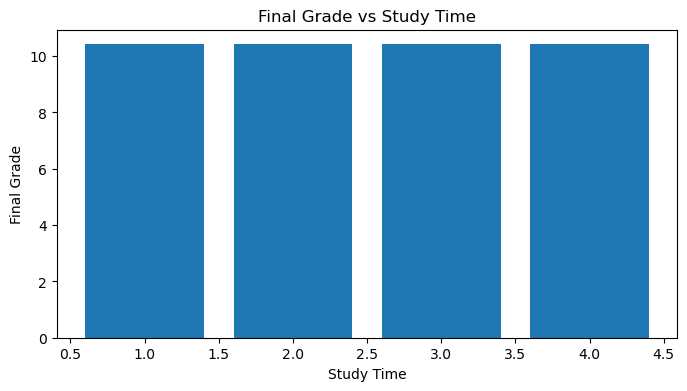

In [102]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(data_new['studytime'], data_new['G3'].mean())        
ax.set_title('Final Grade vs Study Time')
ax.set_xlabel('Study Time')
ax.set_ylabel('Final Grade')

Text(0, 0.5, 'G2')

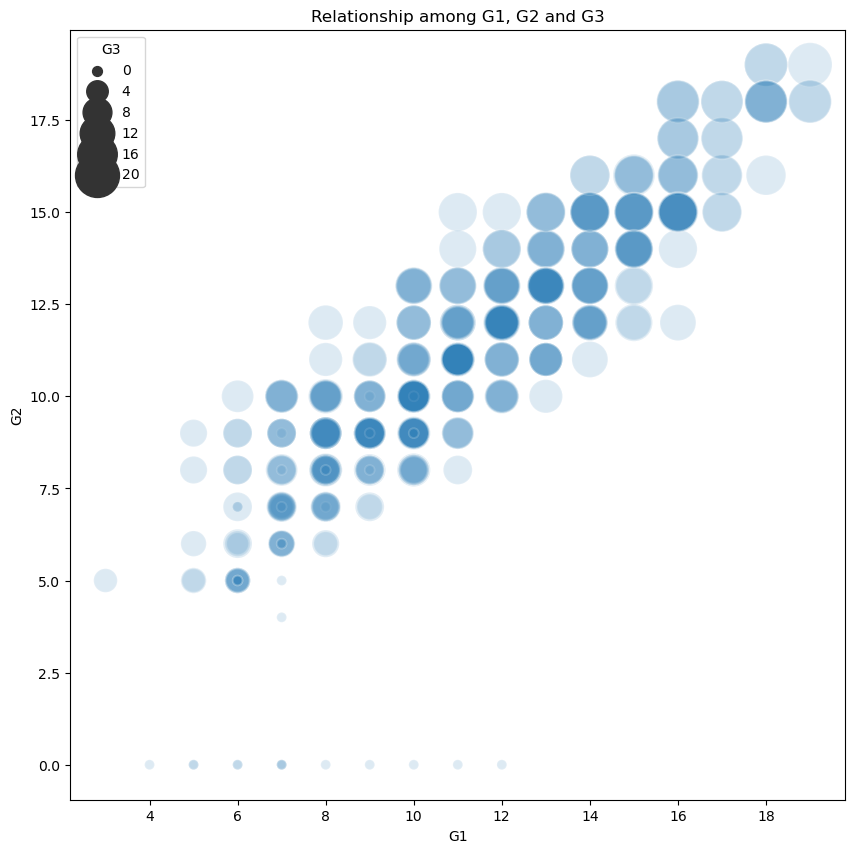

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x= data_new['G1'], y = data_new['G2'], size= data_new['G3'], sizes=(50, 1000), alpha=0.15)
ax.set_title('Relationship among G1, G2 and G3')
ax.set_xlabel('G1')
ax.set_ylabel('G2')


The scatter plot shows that the students who did well in the first('G1') and the second test('G2') also did well in the final test('G3'). 

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

scaler = StandardScaler()
X = data_new.drop('G3', axis=1)
y = data_new['G3']


In [105]:
model = lgb.LGBMRegressor(objective='regression', metric='rmse', num_leaves=31, learning_rate=0.05, feature_fraction=0.9)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_results)
rmse_scores

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 39
[LightGBM] [Info] Start training from score 10.325949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

array([1.91072818, 1.43547152, 1.15241841, 1.6129847 , 1.89923545])

In [106]:
print('Mean RMSE:', rmse_scores.mean())
print('Std RMSE:', rmse_scores.std())

Mean RMSE: 1.6021676516655419
Std RMSE: 0.28762401348573535


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 39
[LightGBM] [Info] Start training from score 10.325949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

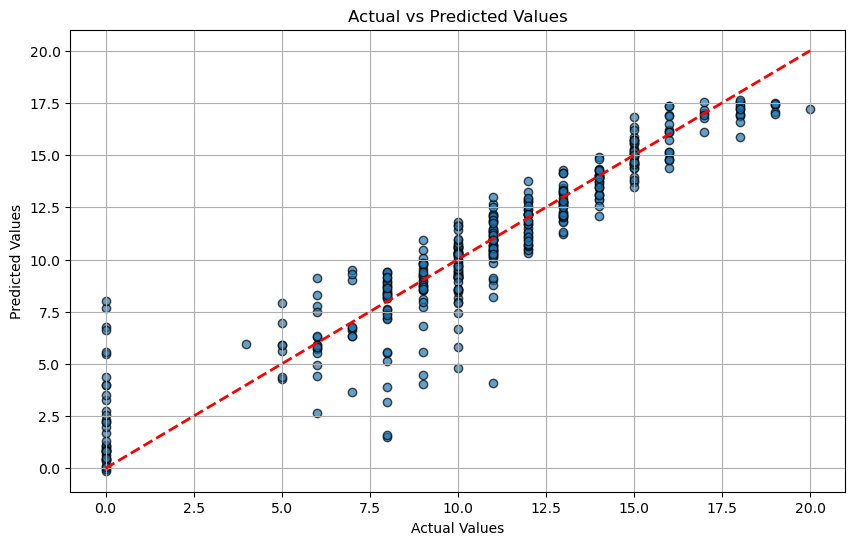

In [107]:
predicted = cross_val_predict(model, X, y, cv=kfold)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


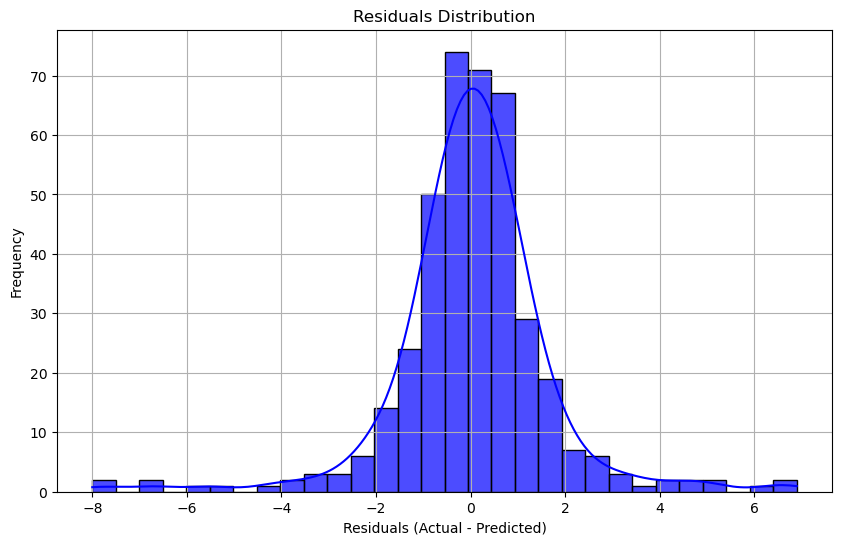

In [108]:
residuals = y - predicted

# Plot the residual distribution using seaborn's histplot (or kdeplot for density)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()